### Import libraries

In [1]:
%matplotlib inline

# importing pandas and numpy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

### Import log file

In [13]:
# load logfile into a Pandas dataframe
# dit stukje geven
df = pd.read_csv(os.path.join('..', 'data', 'logs', 'log_noisy.csv'),
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190035 entries, 2018-11-14 08:57:45.722117 to 2018-11-14 11:17:49.553676
Data columns (total 9 columns):
angle_of_attack    190035 non-null float64
boat_angle         190035 non-null float64
boat_heel          188126 non-null float64
boat_speed         190035 non-null float64
course_error       190035 non-null float64
rudder_angle       190035 non-null float64
target_angle       188092 non-null float64
wind_direction     190035 non-null float64
wind_speed         190035 non-null float64
dtypes: float64(9)
memory usage: 14.5 MB


* angle_of_attack: wind direction relative to the boat
> * A positive angle of attack means the wind is blowing onto the right (starboard) side of the boat
> * A negative angle of attack means the wind is blowing onto the left (port) side of the boat
* boat_angle: compass direction in which the boat is going (North==0/360, East==90, South==180, West==270)
* boat_heel: heeling angle in degrees (rotation around the longitudinal axis).
* boat_speed: speed in knots (5 knots is 9.26 km per hr)
* course_error: difference between boat_angle and target_angle
* rudder_angle: position of the rudder relative to centerline of the boat
* target_angle: compass direction in which you want to go
* wind_direction: direction from where the wind is coming
* wind_speed: wind speed in knots

### Look at a sample of the dataset

In [14]:
# Print the first 5 rows of the dataframe
# YOUR CODE HERE
df.head()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-14 08:57:45.722117,-6.808044,361.428205,2.088108,4.722192,-145.818080,0.0,145.776318,353.150193,17.507828
2018-11-14 08:57:45.772558,-6.940719,358.877005,2.160089,5.107827,-145.861282,0.0,145.776318,352.974317,17.765235
2018-11-14 08:57:45.811315,-6.273972,361.267334,1.959497,4.526222,-145.900472,0.0,145.776318,353.601874,17.819662
2018-11-14 08:57:45.846128,-6.160605,361.546447,1.990789,4.902556,-145.940287,-0.3,145.776318,353.675425,18.432092
2018-11-14 08:57:45.879947,-5.203338,359.726758,1.644039,4.445560,-145.945802,-0.6,145.776318,354.627178,18.014479


In [15]:
# Print the last 5 rows of the dataframe
# YOUR CODE HERE
df.tail()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-14 11:17:49.334954,46.876301,76.581706,13.967042,5.999005,-91.665094,-5.670597,168.5582,123.769408,19.049335
2018-11-14 11:17:49.388467,46.477962,77.940129,14.477358,5.677429,-90.693619,-5.720471,168.5582,124.342543,19.870641
2018-11-14 11:17:49.443995,46.437893,78.571726,14.963033,6.470369,-89.707002,-5.756987,168.5582,125.289092,20.547483
2018-11-14 11:17:49.496616,45.624213,80.308632,14.352734,5.917874,-88.728763,-5.777941,168.5582,125.453650,19.982556
2018-11-14 11:17:49.553676,45.120855,81.400276,14.481747,5.582342,-87.745974,-5.795513,168.5582,125.933082,20.335117


In [ ]:
# If you want you can look at more rows or try different slices
# YOUR CODE HERE

### Plotting the columns
First we will have a visual look at the data.

In [16]:
# Put the columns in a list named 'columns'
# YOUR CODE HERE
columns = list(df)

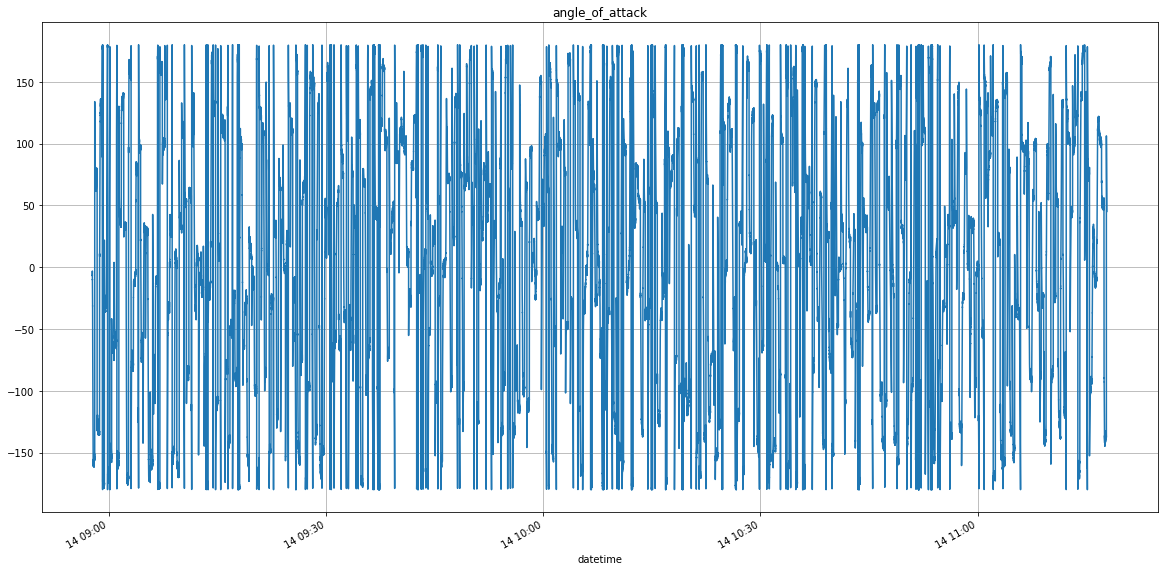

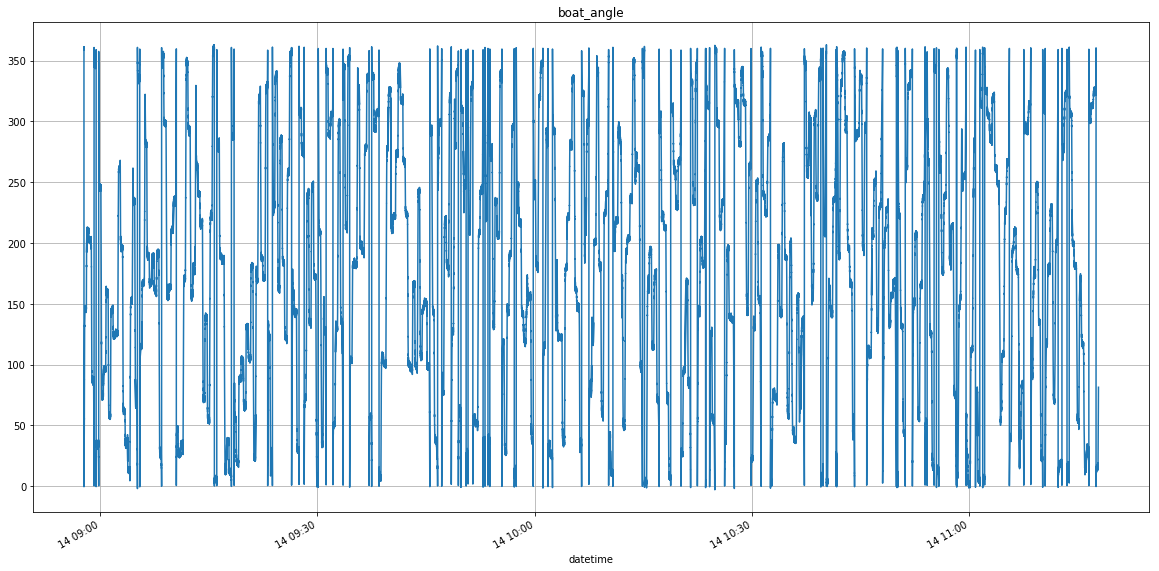

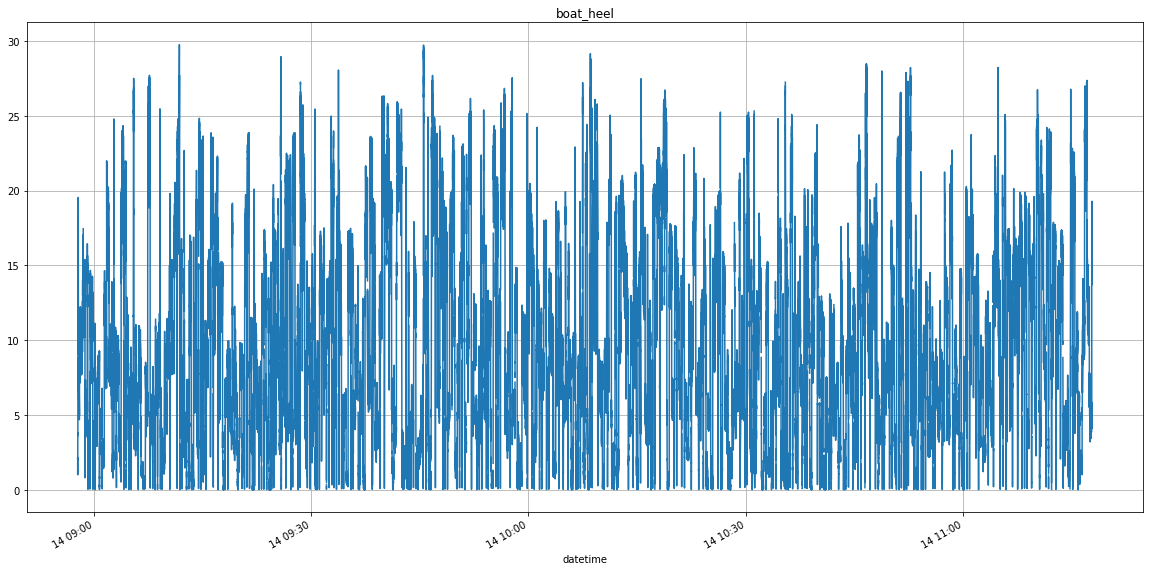

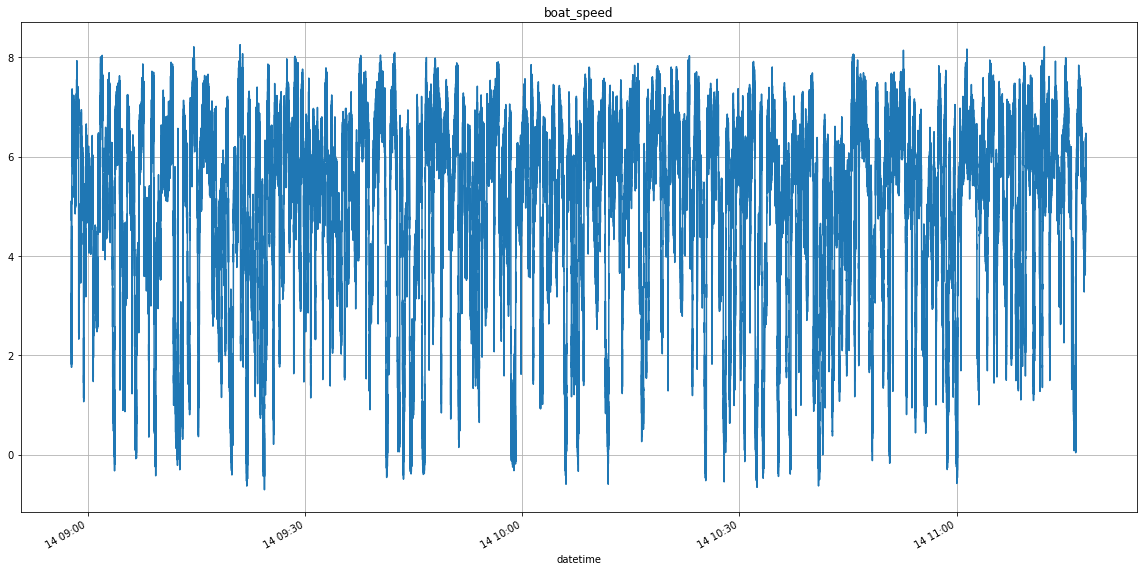

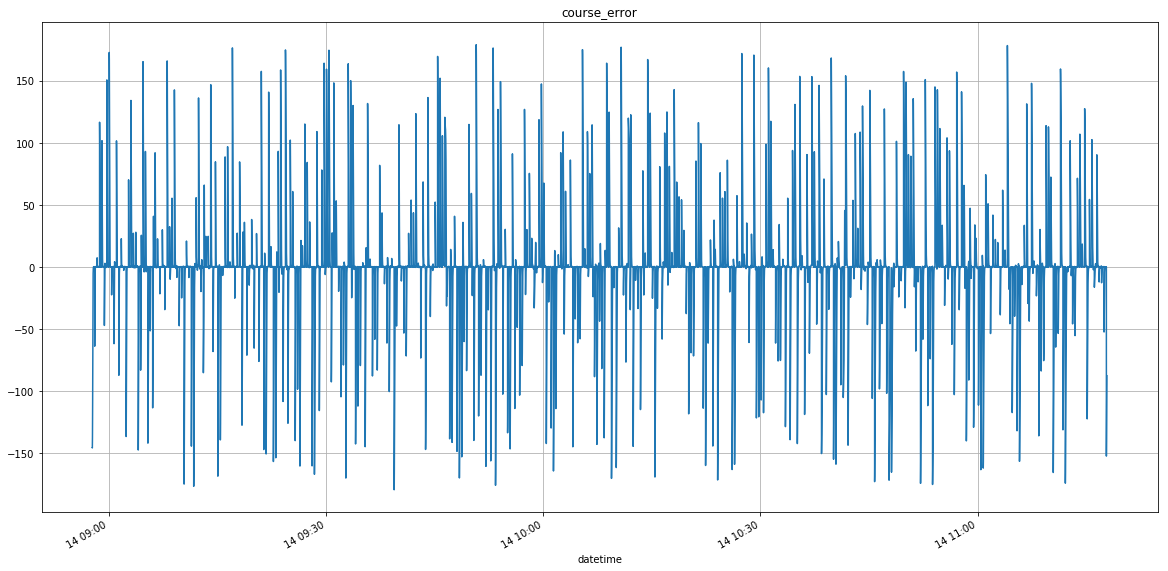

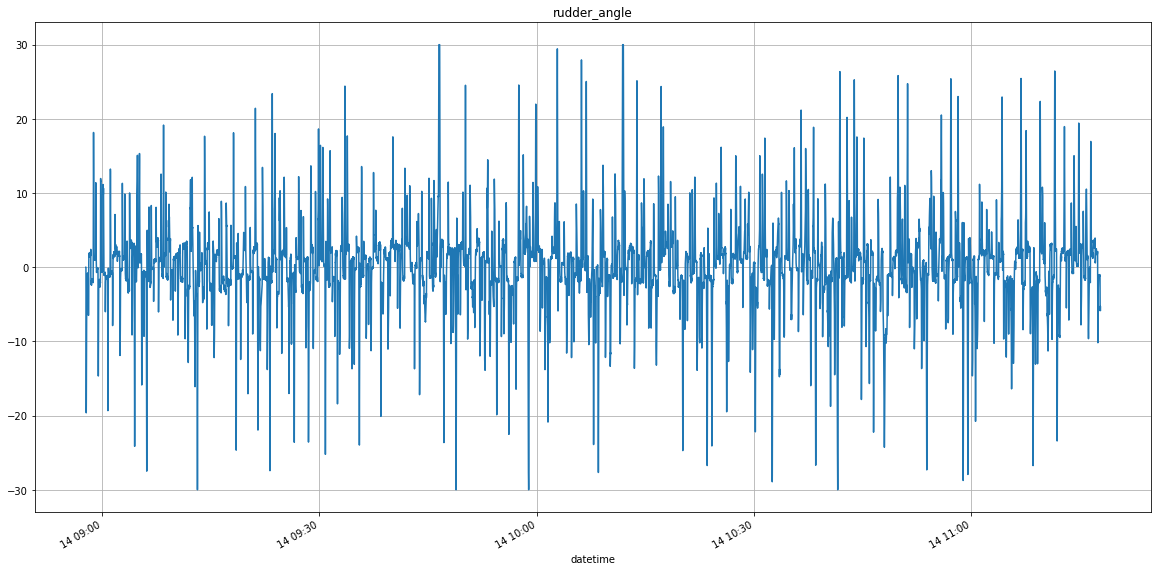

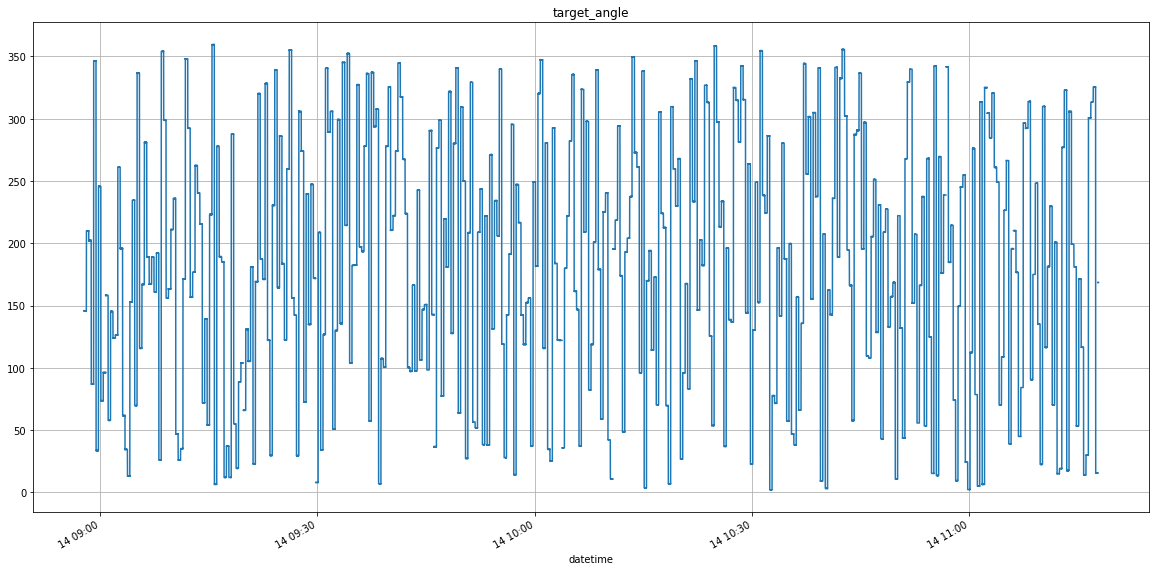

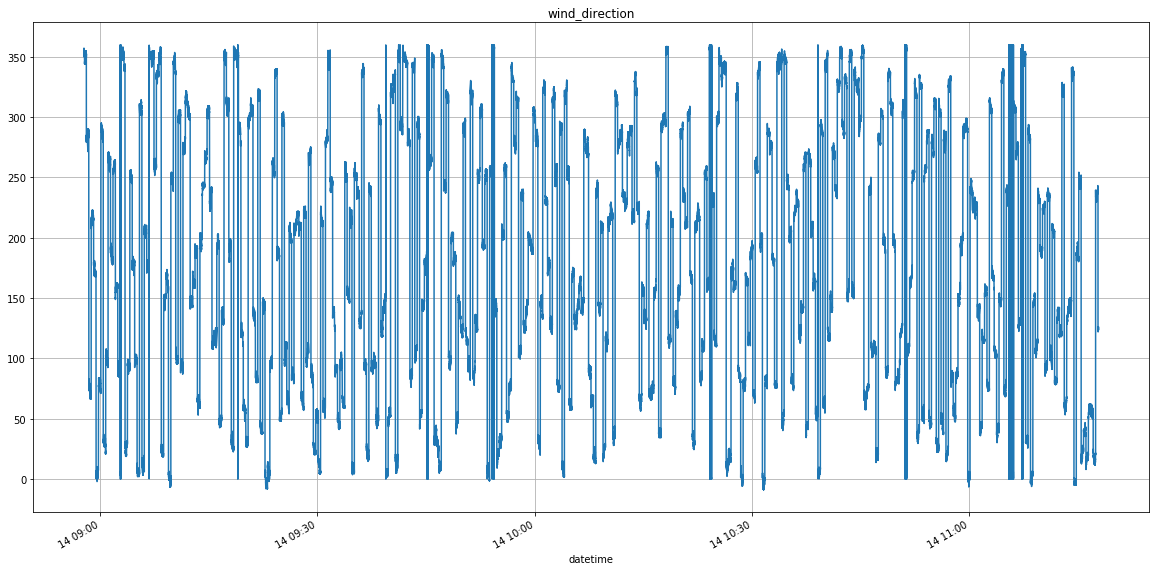

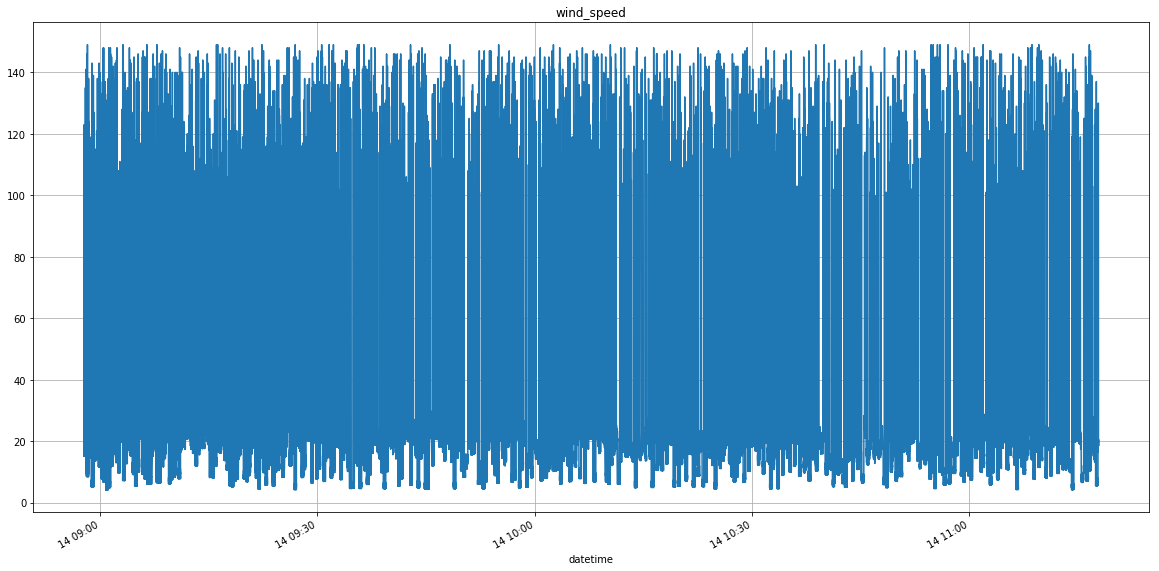

In [18]:
# Plot the data (this can take a few seconds)
# Dit stukje geven
for column in columns:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(column)
    df[column].plot(ax=ax)
    plt.grid(True)

### Zoom in on column rudder_angle
Our AI Captain would like to control the rudder angle of the boat. Let's zoom in on this column in the dataset

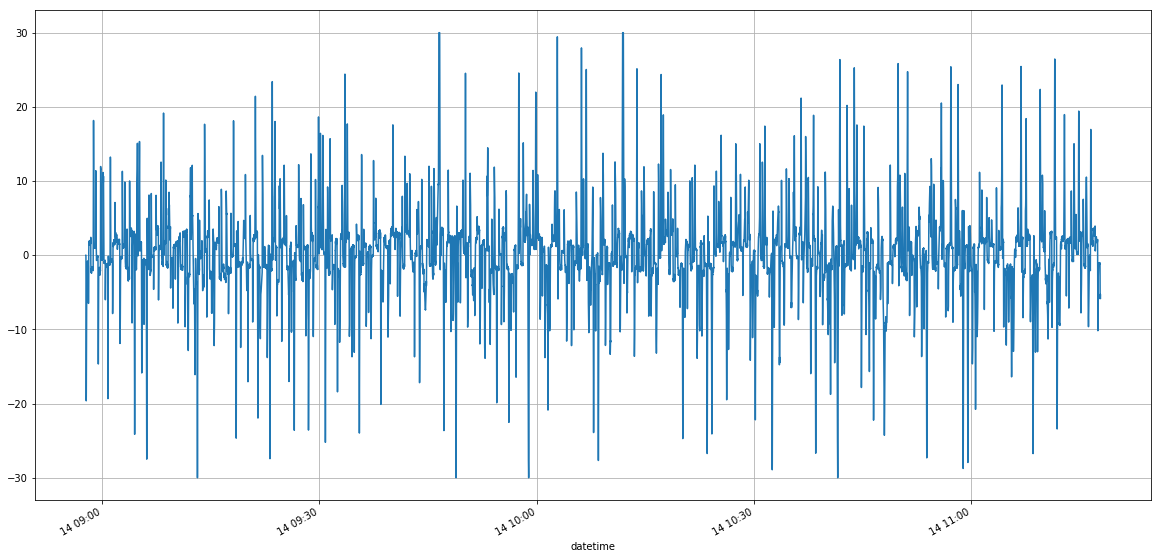

In [31]:
# dit stukje geven
_, ax = plt.subplots(figsize=(20, 10))
df['rudder_angle'].plot(ax=ax)
plt.grid(True)

In [32]:
# Select an interval of 1000 rows (these are 1000 datapoints) and put it in a new dataframe called 'selection'
# YOUR CODE HERE
selection = df.iloc[0:1000]

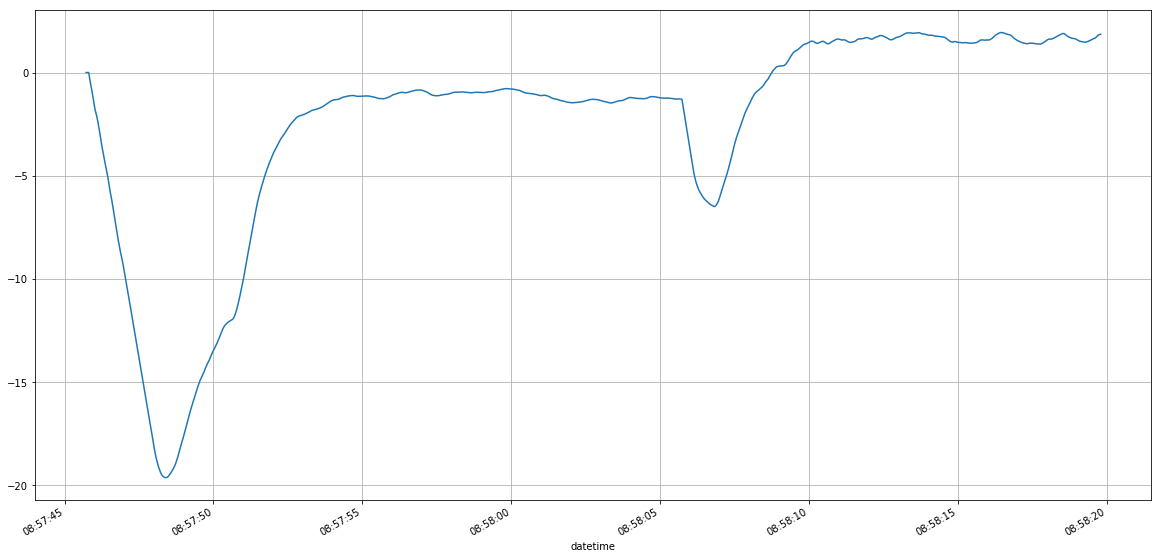

In [33]:
# plot the rudder_angle in your selection
# YOUR CODE HERE
_, ax = plt.subplots(figsize=(20, 10))
selection['rudder_angle'].plot(ax=ax)
plt.grid(True)

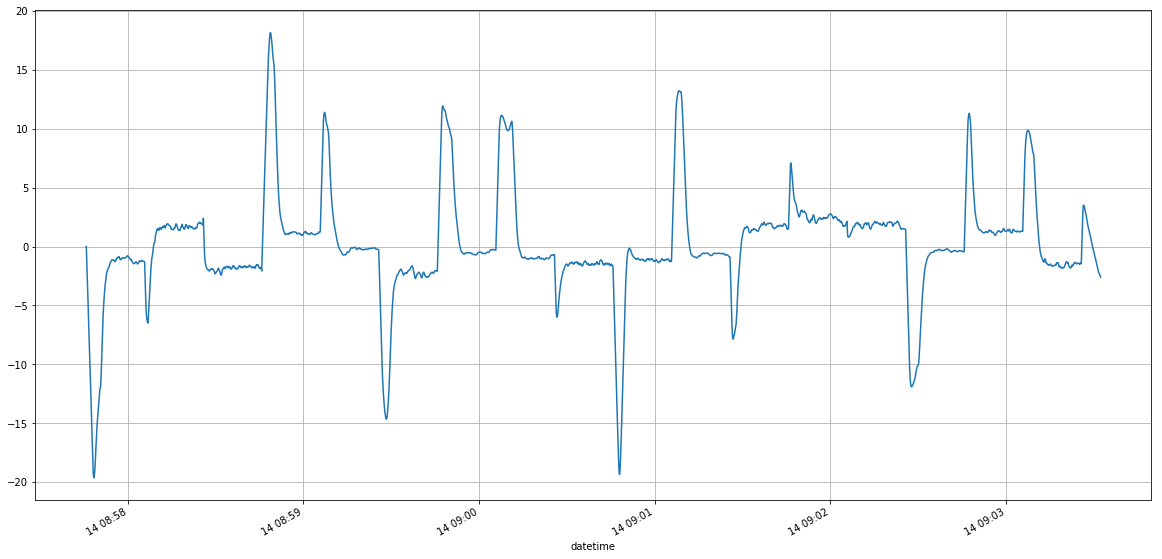

In [34]:
# Try an interval of 10,000 rows now and plot the rudder_angle on this interval
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:10**4]['rudder_angle'].plot(ax=ax)
plt.grid(True)

In [28]:
# Find the maximum and minimum values for rudder_angle in the entire dataset
# YOUR CODE HERE
df.rudder_angle.max(), df.rudder_angle.min()

(30.0, -30.0)

In [30]:
df.loc[df.rudder_angle == df.rudder_angle.max()]

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-14 09:46:28.681337,-1.126204,31.339362,0.407392,0.181158,114.433991,30.0,276.417325,29.725112,20.578594
2018-11-14 09:46:28.724513,-1.998103,31.389712,0.744459,0.201864,114.351049,30.0,276.417325,28.770271,21.193890
2018-11-14 09:46:28.766127,-1.334238,29.253716,0.513599,-0.028991,114.272905,30.0,276.417325,29.355992,21.888829
2018-11-14 09:46:28.817424,-0.311542,31.453140,0.122332,0.276395,114.203578,30.0,276.417325,30.309361,22.323009
2018-11-14 09:46:28.861623,-0.973857,32.320266,0.392276,0.356545,114.130524,30.0,276.417325,29.573992,22.895803
2018-11-14 09:46:28.904001,-1.537449,30.218504,0.592708,0.419591,114.054386,30.0,276.417325,28.934262,21.922004
2018-11-14 09:46:28.948833,-2.074762,29.860867,0.782198,0.572893,113.974540,30.0,276.417325,28.317104,21.443954
2018-11-14 09:46:28.993076,-2.311685,30.540681,0.868047,-0.212053,113.893063,30.0,276.417325,27.998703,21.360295
2018-11-14 09:46:29.036092,-3.011681,30.113753,1.097052,-0.190252,113.807087,30.0,276.417325,27.212731,20.729620


### Boat_angle

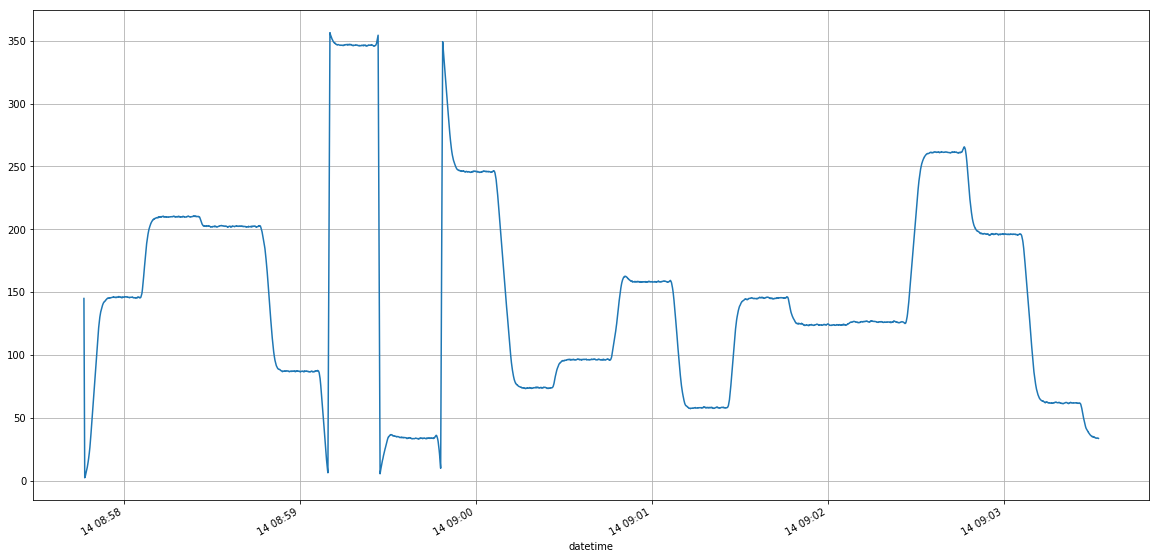

In [21]:
# try moving windows
# voor variable met ruis
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:10**4]['boat_angle'].rolling(20).mean().plot(ax=ax)
plt.grid(True)

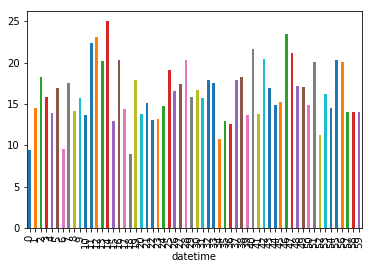

In [23]:
# group average wind_speed per minute
df_9hr = df[df.index.hour == 9]
df_9hr.groupby(df_9hr.index.minute)['wind_speed'].mean().plot(kind='bar')

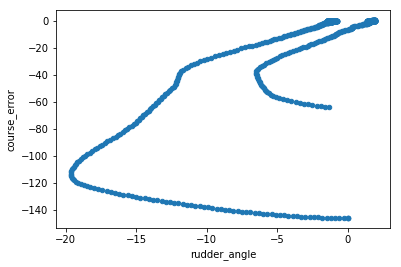

In [36]:
selection.plot.scatter(x='rudder_angle', y='course_error')

### Removing NA's

In [39]:
#Which columns contain NA's?
df.isna().sum()

angle_of_attack     0
boat_angle          0
boat_heel          10
boat_speed          0
course_error        0
rudder_angle        0
target_angle       15
wind_direction      0
wind_speed          0
dtype: int64

In [40]:
df['boat_heel'].fillna((df['boat_heel'].mean()), inplace=True)

In [41]:
df.isna().sum()

angle_of_attack     0
boat_angle          0
boat_heel           0
boat_speed          0
course_error        0
rudder_angle        0
target_angle       15
wind_direction      0
wind_speed          0
dtype: int64

### Removing outliers

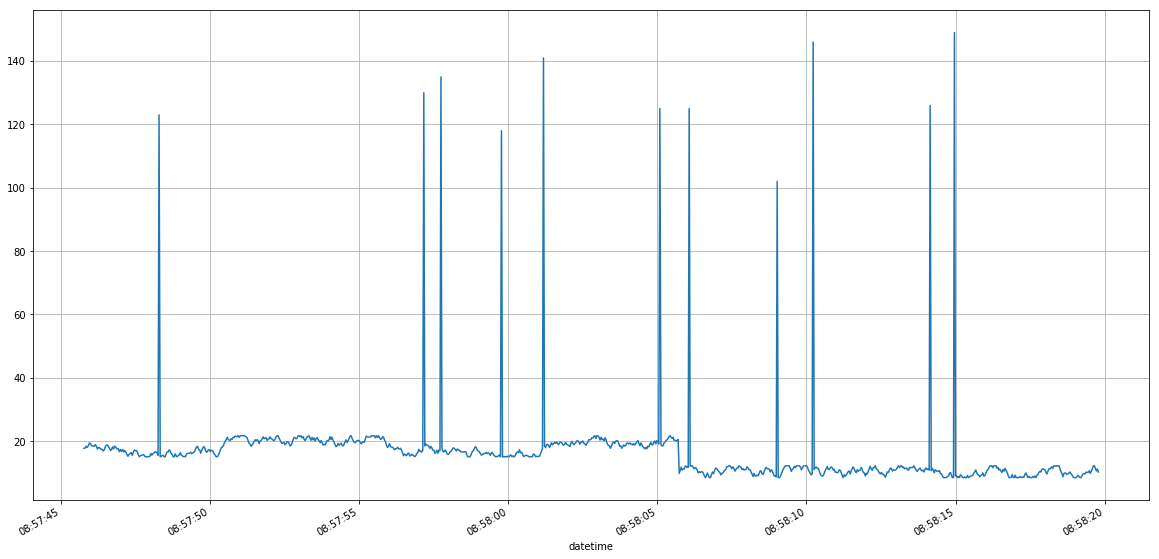

In [20]:
# Which column has outliers?
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[1:1000]['wind_speed'].plot(ax=ax)
plt.grid(True)

In [47]:
df["wind_speed"] = df["wind_speed"].mask(df["wind_speed"] > 35, 0)

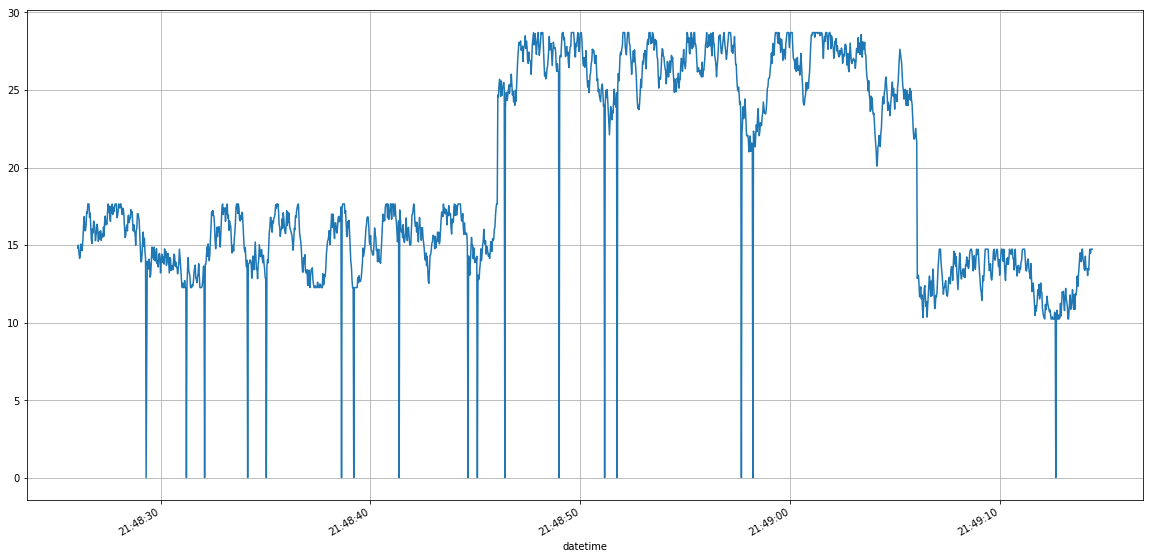

In [48]:
_, ax = plt.subplots(figsize=(20, 10))
df['wind_speed'].plot(ax=ax)
plt.grid(True)

### Clipping rudder_angle

In [29]:
# Check minimum and maximum rudder angle:
df.rudder_angle.min(), df.rudder_angle.max()

(-11.560505458924991, 0.5216799551171323)

In [30]:
# Clip rudder angle to [-10, 10]
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] > 10, 10)
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] < -10, -10)

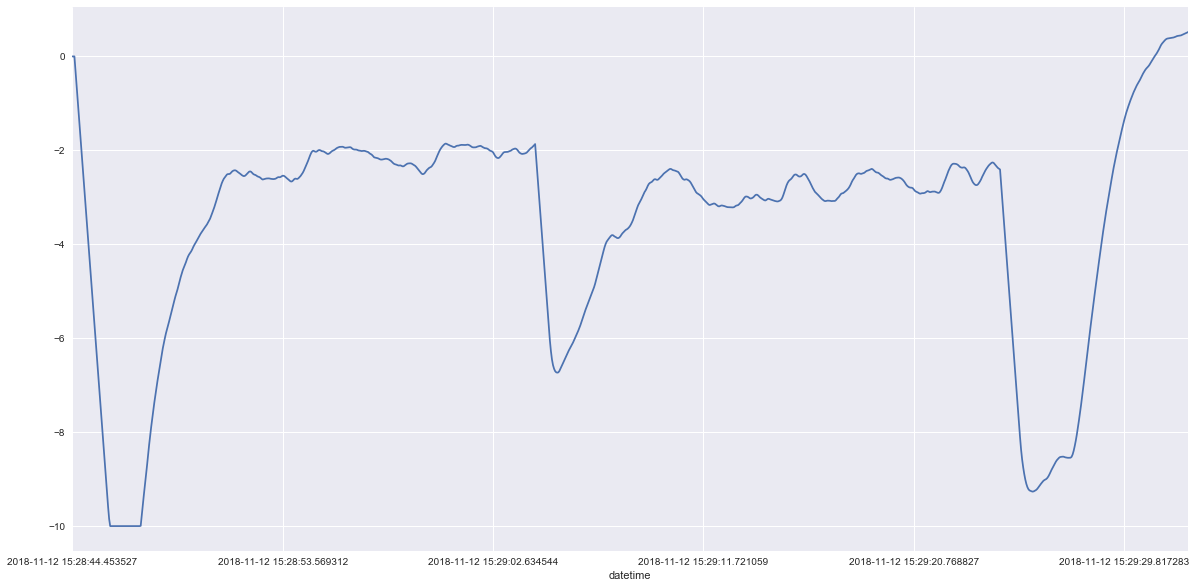

In [31]:
_, ax = plt.subplots(figsize=(20, 10))
df.rudder_angle.plot(ax=ax)

### Creating a new feature

In [5]:
df['VMG'] = df.boat_speed*np.cos(np.deg2rad(df.course_error))

df = df[['wind_speed', 'wind_direction',
         'angle_of_attack', 'boat_heel',
         'boat_speed', 'VMG',
         'target_angle', 'boat_angle', 'course_error',
         'rudder_angle']]

df.head()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
datetime,,,,,,,,,,
2018-11-12 15:34:00.193261,7.906031,49.939838,49.818817,6.051032,5.278842,1.929338,68.683584,-0.521143,-68.562563,0.0
2018-11-12 15:34:00.261939,8.435802,49.057376,48.809147,6.360429,5.102395,1.875389,68.683584,1.376665,-68.435355,0.0
2018-11-12 15:34:00.303224,8.486678,49.166602,48.790432,6.397038,4.646771,1.717570,68.683584,0.908915,-68.307414,0.0
2018-11-12 15:34:00.343971,7.862137,48.274444,47.781607,5.833357,4.847343,1.800874,68.683584,0.690801,-68.190747,-0.3
2018-11-12 15:34:00.384062,8.021908,47.990793,47.349877,5.911353,4.556190,1.703632,68.683584,0.619566,-68.042668,-0.6


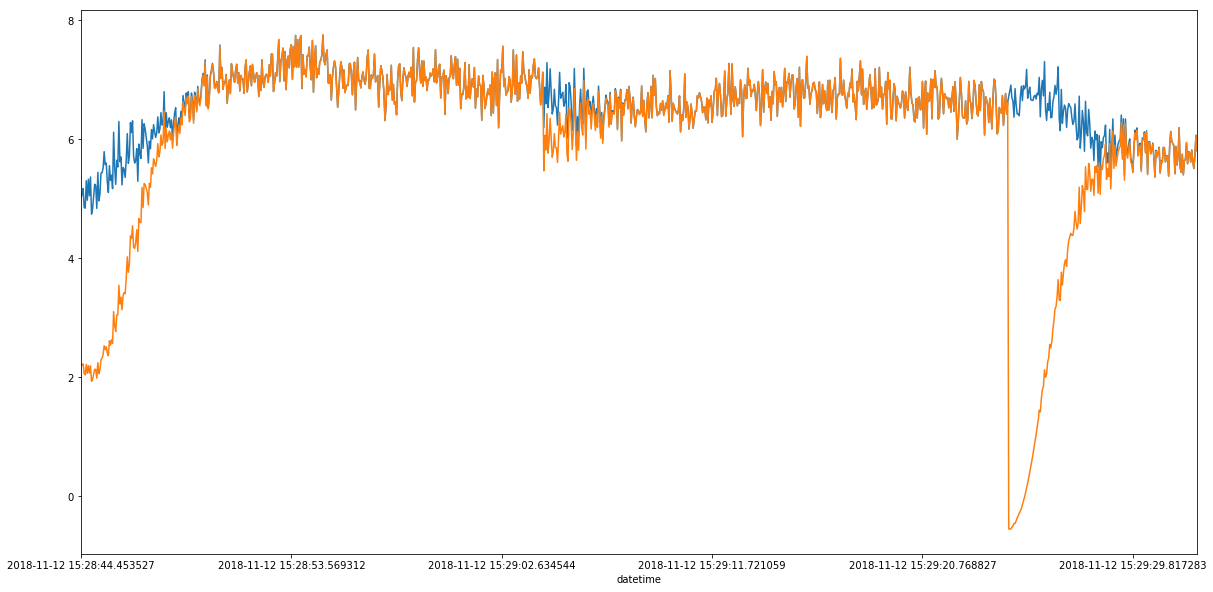

In [23]:
_, ax = plt.subplots(figsize=(20, 10))
df.boat_speed.plot(ax=ax)
df.VMG.plot(ax=ax)

### Normalising data

Maybe this belongs to the machine learning part

### Plotting correlation matrix

In [6]:
corr = df.corr()
corr.style.background_gradient()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
wind_speed,1,0.100344,0.075909,0.622948,0.381296,0.251218,0.0614209,0.0413135,-0.0315221,0.021635
wind_direction,0.100344,1,0.0815391,0.058382,-0.00466797,-0.00548951,0.0603329,0.047232,0.0217387,0.0554432
angle_of_attack,0.075909,0.0815391,1,0.0773903,0.0826843,0.0481267,-0.045931,-0.0254874,0.0217762,0.265943
boat_heel,0.622948,0.058382,0.0773903,1,0.640041,0.411089,0.0724044,0.0562111,-0.0308381,0.0303037
boat_speed,0.381296,-0.00466797,0.0826843,0.640041,1,0.596327,0.0126366,-0.010629,-0.0276509,0.010633
VMG,0.251218,-0.00548951,0.0481267,0.411089,0.596327,1,0.0296892,0.00474208,-0.0191132,0.00587258
target_angle,0.0614209,0.0603329,-0.045931,0.0724044,0.0126366,0.0296892,1,0.757027,-0.0372505,-0.0525081
boat_angle,0.0413135,0.047232,-0.0254874,0.0562111,-0.010629,0.00474208,0.757027,1,0.020866,-0.0208435
course_error,-0.0315221,0.0217387,0.0217762,-0.0308381,-0.0276509,-0.0191132,-0.0372505,0.020866,1,0.625584
rudder_angle,0.021635,0.0554432,0.265943,0.0303037,0.010633,0.00587258,-0.0525081,-0.0208435,0.625584,1


* slices
* to_pickle voor stukje Wouter